In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
df = pd.read_csv("E:\Datasets\AutoData (1).csv")

In [181]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [182]:
df.shape

(205, 25)

In [183]:
df.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [184]:
df.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [185]:
df.dtypes

symboling             int64
make                 object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [186]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('______________________________________________')

symboling
[ 3  1  2  0 -1 -2]
______________________________________________
make
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 cust

In [187]:
a = []
for brand in df['make']:
    a.append(brand.split( ' ',1)[0])

In [188]:
df['brand'] = a

In [189]:
df['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [190]:
df['brand'] = df['brand'].replace('maxda','mazda')
df['brand'] = df['brand'].replace('toyouta','toyota')
df['brand'] = df['brand'].replace('Nissan','nissan')
df['brand'] = df['brand'].replace('porcshce','porsche')
df['brand'] = df['brand'].replace(['vw','vokswagen'],'volkswagen')

In [191]:
del df['make']

In [192]:
df.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

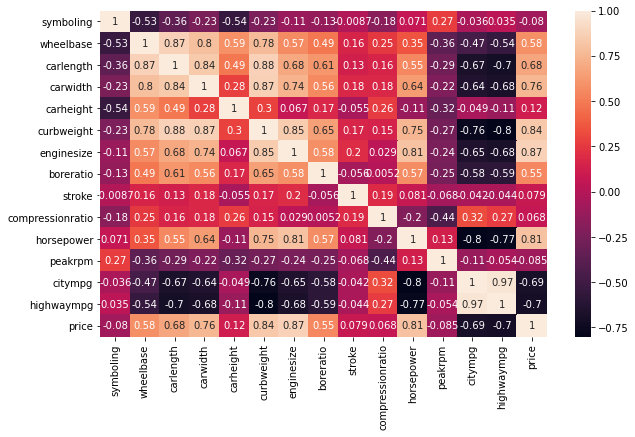

In [193]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot= True)
plt.show()

## CONTINUOUS NUMERICAL VARIABLES

<AxesSubplot:xlabel='enginesize', ylabel='price'>

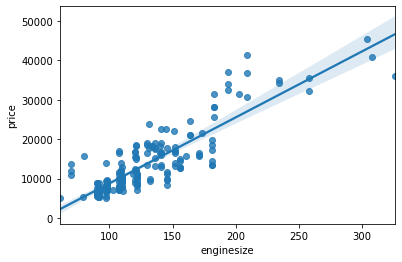

In [194]:
sns.regplot(x = 'enginesize', y = 'price', data = df)

<AxesSubplot:xlabel='highwaympg', ylabel='price'>

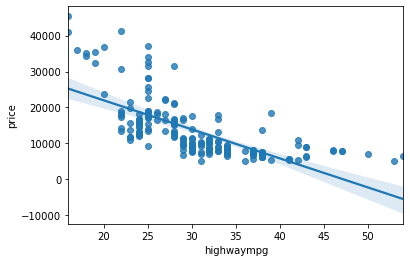

In [195]:
sns.regplot(x = 'highwaympg', y = 'price', data = df)

<AxesSubplot:xlabel='peakrpm', ylabel='price'>

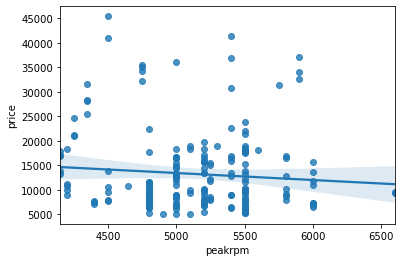

In [196]:
sns.regplot(x = 'peakrpm', y = 'price', data = df)

<AxesSubplot:xlabel='stroke', ylabel='price'>

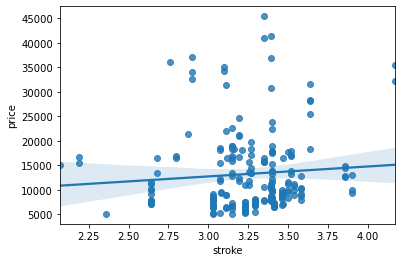

In [197]:
sns.regplot(x = 'stroke', y = 'price', data = df)

## CATEGORICAL VARIABLES

<AxesSubplot:xlabel='enginelocation', ylabel='price'>

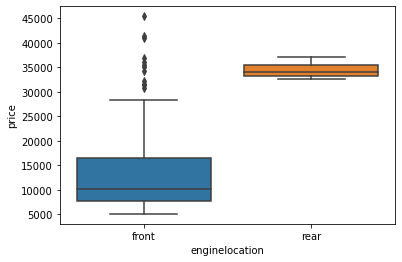

In [198]:
sns.boxplot(x = 'enginelocation' , y = 'price', data = df)

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

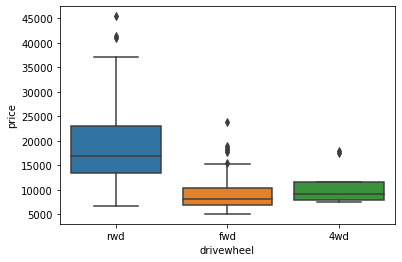

In [199]:
sns.boxplot(x = 'drivewheel' , y = 'price', data = df)

<AxesSubplot:xlabel='carbody', ylabel='price'>

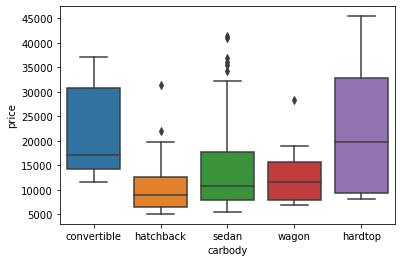

In [200]:
sns.boxplot(x = 'carbody' , y = 'price', data = df)

In [201]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [202]:
df.describe(include = 'object')

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand
count,205,205,205,205,205,205,205,205,205,205
unique,2,2,2,5,3,2,7,7,8,22
top,gas,std,four,sedan,fwd,front,ohc,four,mpfi,toyota
freq,185,168,115,96,120,202,148,159,94,32


### PEARSON CORRELATION AND P-VALUE

The Pearson Correlation measures the linear dependence between two variables X and Y.

The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

In [203]:
from scipy import stats

In [204]:
pearson_coef, p_value = stats.pearsonr(df['wheelbase'], df['price'])
print(f'The pearson correlation coefficient is : {pearson_coef} and p-value is {p_value}')

The pearson correlation coefficient is : 0.57781559829215 and p-value is 1.1828204863378005e-19


Since, p-value < 0.001 and the correlation between wheelbase and price is statistically significant, although the linear relation is not very strong (0.577)

In [205]:
pearson_coef, p_value = stats.pearsonr(df['enginesize'], df['price'])
print(f'The pearson correlation coefficient is : {pearson_coef} and p-value is {p_value}')

The pearson correlation coefficient is : 0.8741448025245117 and p-value is 1.3547637598648421e-65


Since, p-value < 0.001 and the correlation between enginesize and price is statistically significant,and the linear relation is quite very strong (0.87)

In [206]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print(f'The pearson correlation coefficient is : {pearson_coef} and p-value is {p_value}')

The pearson correlation coefficient is : 0.8081388225362218 and p-value is 1.483436573293965e-48


Since, p-value < 0.001 and the correlation between horsepower and price is statistically significant,and the linear relationship is quite very strong (0.81)

In [207]:
pearson_coef, p_value = stats.pearsonr(df['carlength'], df['price'])
print(f'The pearson correlation coefficient is : {pearson_coef} and p-value is {p_value}')

The pearson correlation coefficient is : 0.6829200156779622 and p-value is 1.6787066240746602e-29


Since, p-value < 0.001 and the correlation between carlength and price is statistically significant,and the linear relationship is moderately strong (0.68)

In [208]:
pearson_coef, p_value = stats.pearsonr(df['curbweight'], df['price'])
print(f'The pearson correlation coefficient is : {pearson_coef} and p-value is {p_value}')

The pearson correlation coefficient is : 0.8353048793372966 and p-value is 1.2144448264032206e-54


Since, p-value < 0.001 and the correlation between carlength and price is statistically significant,and the linear relationship is quite strong (0.83)

## SIMPLE LINEAR REGRESSION

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import r2_score

In [210]:
X = df[['curbweight']]
y = df['price']

In [211]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [212]:
model = LinearRegression()

In [213]:
model.fit(X_train,y_train)

LinearRegression()

In [214]:
y_pred = model.predict(X_test)

In [215]:
print(f'Training  R2 score : {r2_score(y_train, model.predict(X_train))}')

Training  R2 score : 0.68487262451036


In [216]:
print(f'Testing R2 score : {r2_score(y_test,y_pred)}')

Testing R2 score : 0.7542365691348998


In [217]:
df.shape

(205, 25)

### MULTIPLE LINEAR REGRESSION

In [218]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [219]:
X = df.drop('price',axis = 1)
y = df['price']

In [220]:
X = pd.get_dummies(X,drop_first = True)

In [221]:
X.shape

(205, 64)

In [222]:
for col in X.columns:
    print(col)
    print(X[col].value_counts())

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
wheelbase
94.5     21
93.7     20
95.7     13
96.5      8
98.4      7
97.3      7
96.3      6
107.9     6
98.8      6
99.1      6
104.3     6
100.4     6
93.1      5
97.2      5
102.4     5
109.1     5
95.9      5
101.2     4
97.0      4
114.2     4
95.3      4
105.8     3
103.5     3
110.0     3
89.5      3
99.8      2
86.6      2
113.0     2
104.5     2
104.9     2
88.6      2
96.9      2
91.3      2
115.6     2
102.9     2
96.1      2
103.3     2
112.0     1
99.5      1
88.4      1
99.2      1
96.0      1
102.0     1
106.7     1
93.0      1
99.4      1
93.3      1
102.7     1
120.9     1
95.1      1
96.6      1
94.3      1
108.0     1
Name: wheelbase, dtype: int64
carlength
157.3    15
188.8    11
166.3     7
171.7     7
186.7     7
         ..
157.9     1
177.3     1
175.7     1
193.8     1
183.1     1
Name: carlength, Length: 75, dtype: int64
carwidth
63.8    24
66.5    23
65.4    15
63.6

In [223]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [224]:
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [225]:
linear_model = LinearRegression()

In [226]:
rfe = RFE(linear_model, 15)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [227]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [228]:
rfe.support_

array([False, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False])

In [229]:
filtercol = X.columns[rfe.support_]
filtercol

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_ohcf',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'brand_bmw', 'brand_porsche', 'brand_subaru'],
      dtype='object')

In [230]:
X_train

array([[0.4       , 0.63103448, 0.52413793, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.73448276, 0.72586207, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.3137931 , 0.43275862, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.6       , 0.27241379, 0.35689655, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.56206897, 0.67068966, ..., 1.        , 0.        ,
        0.        ],
       [0.4       , 0.47586207, 0.68965517, ..., 0.        , 0.        ,
        0.        ]])

In [231]:
X_train = pd.DataFrame(X_train, columns = X.columns)

In [232]:
X_train = X_train[filtercol]

In [233]:
y_train = y_train.reset_index(drop = True)

In [234]:
y_train

0      18344.0
1      15580.0
2       6918.0
3       7499.0
4       9095.0
        ...   
159    18399.0
160    24565.0
161     6849.0
162    15998.0
163    14399.0
Name: price, Length: 164, dtype: float64

In [235]:
import statsmodels.api as sm

In [236]:
lm  = sm.OLS(y_train,X_train).fit()

In [237]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              425.5
Date:                Wed, 23 Jun 2021   Prob (F-statistic):                   5.20e-113
Time:                        22:00:04   Log-Likelihood:                         -1509.1
No. Observations:                 164   AIC:                                      3046.
Df Residuals:                     150   BIC:                                      3090.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
carwidth               1.179e+04   2110.580      5.586      0.000    7619.887     1.6e+04
curbweight             6605.2740   2360.625      2.798      0.006    1940.903    1.13e+04
enginesize             2.157e+04   3097.470      6.964      0.000    1.55e+04    2.77e+04
boreratio             -3980.9790   1957.139     -2.034      0.044   -7848.101    -113.857
horsepower             1.105e+04   2615.659      4.226      0.000    5884.241    1.62e+04
enginelocation_rear    8854.7895   2077.344      4.263      0.000    4750.154     1.3e+04
enginetype_dohcv      -6779.8425   3861.160     -1.756      0.081   -1.44e+04     849.444
enginetype_ohcf        4771.8417   1094.886      4.358      0.000    2608.450    6935.233
cylindernumber_five    1153.7547   1314.768      0.878      0.382   -1444.102    3751.611
cylindernumber_four    1229.8812    648.088      1.898      0.060     -50.679    2510.441
cylindernumber_six    -3348.8646   1020.108     -3.283      0.001   -5364.501   -1333.228
cylindernumber_twelve -8707.3058   3275.647     -2.658      0.009   -1.52e+04   -2234.938
brand_bmw              8977.5883   1162.194      7.725      0.000    6681.203    1.13e+04
brand_porsche          3564.5435   2600.459      1.371      0.173   -1573.717    8702.804
brand_subaru          -4082.9478   1250.000     -3.266      0.001   -6552.829   -1613.067
==============================================================================
Omnibus:                        4.123   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                4.039
Skew:                           0.232   Prob(JB):                        0.133
Kurtosis:                       3.614   Cond. No.                     6.43e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.5e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [238]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [239]:
VIF = []
for i in range(0,X_train.shape[1]):
    VIF.append(variance_inflation_factor(X_train.values,i))

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [240]:
VIF

[22.60000339712584,
 23.11909271191205,
 18.34084464552497,
 34.71509697010955,
 14.03132472093238,
 inf,
 2.3675476668261877,
 inf,
 1.6470715856466616,
 8.671097978540551,
 3.3051069987250514,
 1.7039518439232975,
 1.2869798066839446,
 5.369491547361252,
 inf]

In [241]:
vif = pd.DataFrame({'Features': X_train.columns, 'VIF': VIF})

In [242]:
vif.sort_values(by = 'VIF',ascending = False)

,Features,VIF
5,enginelocation_rear,inf
7,enginetype_ohcf,inf
14,brand_subaru,inf
3,boreratio,34.715097
1,curbweight,23.119093
0,carwidth,22.600003
2,enginesize,18.340845
4,horsepower,14.031325
9,cylindernumber_four,8.671098
13,brand_porsche,5.369492


Now, we will drop all the columns which has VIF > 5 and P-value > 0.05. 

In [243]:
X_train = X_train.drop(columns = 'cylindernumber_four', axis = 1)

In [244]:
lm = sm.OLS(y_train,X_train).fit()

In [245]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              450.2
Date:                Wed, 23 Jun 2021   Prob (F-statistic):                   1.42e-113
Time:                        22:01:00   Log-Likelihood:                         -1511.1
No. Observations:                 164   AIC:                                      3048.
Df Residuals:                     151   BIC:                                      3088.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
carwidth               1.283e+04   2055.745      6.241      0.000    8767.931    1.69e+04
curbweight             4779.6615   2174.199      2.198      0.029     483.881    9075.442
enginesize             2.077e+04   3095.169      6.711      0.000    1.47e+04    2.69e+04
boreratio             -1173.9815   1292.594     -0.908      0.365   -3727.888    1379.925
horsepower              1.03e+04   2607.393      3.949      0.000    5145.798    1.54e+04
enginelocation_rear    9153.7361   2089.129      4.382      0.000    5026.038    1.33e+04
enginetype_dohcv      -7302.1353   3884.370     -1.880      0.062    -1.5e+04     372.600
enginetype_ohcf        4598.6347   1100.433      4.179      0.000    2424.400    6772.870
cylindernumber_five     347.5385   1254.909      0.277      0.782   -2131.910    2826.987
cylindernumber_six    -3644.0801   1016.824     -3.584      0.000   -5653.119   -1635.041
cylindernumber_twelve -8383.0075   3299.242     -2.541      0.012   -1.49e+04   -1864.368
brand_bmw              8667.9769   1160.555      7.469      0.000    6374.954     1.1e+04
brand_porsche          2666.4929   2578.969      1.034      0.303   -2429.031    7762.016
brand_subaru          -4555.1014   1235.495     -3.687      0.000   -6996.191   -2114.012
==============================================================================
Omnibus:                        0.294   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.146
Skew:                          -0.069   Prob(JB):                        0.930
Kurtosis:                       3.048   Cond. No.                     5.00e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.5e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [246]:
VIF = []
for i in range(0,X_train.shape[1]):
    VIF.append(variance_inflation_factor(X_train.values,i))

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [247]:
vif = pd.DataFrame({'Features': X_train.columns, 'VIF': VIF})

In [249]:
vif.sort_values(by = 'VIF', ascending= False)

,Features,VIF
5,enginelocation_rear,inf
7,enginetype_ohcf,inf
13,brand_subaru,inf
0,carwidth,21.077794
1,curbweight,19.279586
2,enginesize,18.003459
3,boreratio,14.886122
4,horsepower,13.706663
12,brand_porsche,5.191673
9,cylindernumber_six,3.228245


In [250]:
X_train = X_train.drop('boreratio', axis = 1)

In [251]:
lm = sm.OLS(y_train,X_train).fit()

In [252]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              488.2
Date:                Wed, 23 Jun 2021   Prob (F-statistic):                   9.45e-115
Time:                        22:01:47   Log-Likelihood:                         -1511.5
No. Observations:                 164   AIC:                                      3047.
Df Residuals:                     152   BIC:                                      3084.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
carwidth               1.195e+04   1810.102      6.600      0.000    8370.163    1.55e+04
curbweight             4731.8847   2172.311      2.178      0.031     440.064    9023.706
enginesize              2.03e+04   3049.706      6.657      0.000    1.43e+04    2.63e+04
horsepower             9498.9224   2453.261      3.872      0.000    4652.029    1.43e+04
enginelocation_rear    9142.8547   2087.890      4.379      0.000    5017.822    1.33e+04
enginetype_dohcv      -6366.8787   3743.232     -1.701      0.091   -1.38e+04    1028.603
enginetype_ohcf        4352.2577   1065.859      4.083      0.000    2246.446    6458.069
cylindernumber_five     809.1580   1146.714      0.706      0.481   -1456.399    3074.714
cylindernumber_six    -3201.2455    891.786     -3.590      0.000   -4963.142   -1439.349
cylindernumber_twelve -7254.6446   3054.630     -2.375      0.019   -1.33e+04   -1219.631
brand_bmw              8416.5532   1126.406      7.472      0.000    6191.119    1.06e+04
brand_porsche          2516.5699   2572.198      0.978      0.329   -2565.305    7598.445
brand_subaru          -4790.5970   1207.285     -3.968      0.000   -7175.822   -2405.372
==============================================================================
Omnibus:                        0.408   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.174
Skew:                          -0.055   Prob(JB):                        0.917
Kurtosis:                       3.115   Cond. No.                     4.28e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.73e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [253]:
VIF = []
for i in range(0,X_train.shape[1]):
    VIF.append(variance_inflation_factor(X_train.values,i))

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [255]:
pd.DataFrame({'Features':X_train.columns, 'VIF': VIF}).sort_values(by = 'VIF',ascending= False)

,Features,VIF
4,enginelocation_rear,inf
6,enginetype_ohcf,inf
12,brand_subaru,inf
1,curbweight,19.268301
2,enginesize,17.498622
0,carwidth,16.360391
3,horsepower,12.148057
11,brand_porsche,5.170404
8,cylindernumber_six,2.485977
5,enginetype_dohcv,2.189976


In [256]:
X_train = X_train.drop('brand_porsche', axis = 1)

In [257]:
lm = sm.OLS(y_train,X_train).fit()

In [258]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              532.7
Date:                Wed, 23 Jun 2021   Prob (F-statistic):                   6.43e-116
Time:                        22:12:16   Log-Likelihood:                         -1512.1
No. Observations:                 164   AIC:                                      3046.
Df Residuals:                     153   BIC:                                      3080.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
carwidth               1.204e+04   1807.057      6.665      0.000    8474.706    1.56e+04
curbweight             4541.6531   2163.289      2.099      0.037     267.881    8815.426
enginesize             2.034e+04   3049.010      6.672      0.000    1.43e+04    2.64e+04
horsepower             9734.1290   2441.112      3.988      0.000    4911.491    1.46e+04
enginelocation_rear    1.078e+04   1244.987      8.661      0.000    8322.991    1.32e+04
enginetype_dohcv      -4073.5060   2918.006     -1.396      0.165   -9838.290    1691.278
enginetype_ohcf        5160.0589    673.958      7.656      0.000    3828.595    6491.523
cylindernumber_five     757.2210   1145.325      0.661      0.510   -1505.471    3019.913
cylindernumber_six    -3255.3037    889.948     -3.658      0.000   -5013.477   -1497.131
cylindernumber_twelve -7405.6373   3050.302     -2.428      0.016   -1.34e+04   -1379.490
brand_bmw              8410.0007   1126.229      7.467      0.000    6185.034    1.06e+04
brand_subaru          -5622.5161    856.917     -6.561      0.000   -7315.433   -3929.600
==============================================================================
Omnibus:                        0.395   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.821   Jarque-Bera (JB):                0.193
Skew:                          -0.072   Prob(JB):                        0.908
Kurtosis:                       3.087   Cond. No.                     4.27e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.73e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [259]:
VIF = []
for i in range(0,X_train.shape[1]):
    VIF.append(variance_inflation_factor(X_train.values,i))

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [260]:
pd.DataFrame({'Features':X_train.columns, 'VIF': VIF}).sort_values(by = 'VIF',ascending= False)

,Features,VIF
4,enginelocation_rear,inf
6,enginetype_ohcf,inf
11,brand_subaru,inf
1,curbweight,19.113933
2,enginesize,17.495525
0,carwidth,16.309946
3,horsepower,12.031400
8,cylindernumber_six,2.476434
9,cylindernumber_twelve,1.454632
5,enginetype_dohcv,1.331189


In [261]:
X_train = X_train.drop('enginetype_dohcv', axis = 1)

In [262]:
lm = sm.OLS(y_train,X_train).fit()

In [263]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              582.2
Date:                Wed, 23 Jun 2021   Prob (F-statistic):                   6.83e-117
Time:                        22:15:04   Log-Likelihood:                         -1513.1
No. Observations:                 164   AIC:                                      3046.
Df Residuals:                     154   BIC:                                      3077.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
carwidth               1.205e+04   1812.615      6.645      0.000    8464.616    1.56e+04
curbweight             5095.0644   2133.196      2.388      0.018     880.961    9309.168
enginesize              2.06e+04   3052.767      6.748      0.000    1.46e+04    2.66e+04
horsepower             8204.9547   2188.250      3.750      0.000    3882.093    1.25e+04
enginelocation_rear    1.106e+04   1232.926      8.970      0.000    8623.312    1.35e+04
enginetype_ohcf        5319.9234    666.200      7.985      0.000    4003.853    6635.993
cylindernumber_five     820.5328   1147.946      0.715      0.476   -1447.222    3088.287
cylindernumber_six    -3046.7431    880.017     -3.462      0.001   -4785.206   -1308.280
cylindernumber_twelve -6828.2991   3031.431     -2.253      0.026   -1.28e+04    -839.744
brand_bmw              8414.3393   1129.688      7.448      0.000    6182.653    1.06e+04
brand_subaru          -5739.0200    855.466     -6.709      0.000   -7428.984   -4049.057
==============================================================================
Omnibus:                        0.236   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.116
Skew:                          -0.063   Prob(JB):                        0.944
Kurtosis:                       3.029   Cond. No.                     4.73e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.86e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [264]:
VIF = []
for i in range(0,X_train.shape[1]):
    VIF.append(variance_inflation_factor(X_train.values,i))

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [265]:
pd.DataFrame({'Features':X_train.columns, 'VIF': VIF}).sort_values(by = 'VIF',ascending= False)

,Features,VIF
4,enginelocation_rear,inf
5,enginetype_ohcf,inf
10,brand_subaru,inf
1,curbweight,18.472055
2,enginesize,17.431277
0,carwidth,16.309944
3,horsepower,9.608753
7,cylindernumber_six,2.406644
8,cylindernumber_twelve,1.427892
6,cylindernumber_five,1.228554


In [266]:
X_train = X_train.drop('cylindernumber_five', axis = 1)

In [267]:
lm = sm.OLS(y_train,X_train).fit()

In [268]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              648.8
Date:                Wed, 23 Jun 2021   Prob (F-statistic):                   3.36e-118
Time:                        22:17:23   Log-Likelihood:                         -1513.4
No. Observations:                 164   AIC:                                      3045.
Df Residuals:                     155   BIC:                                      3073.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
carwidth               1.246e+04   1715.433      7.262      0.000    9069.584    1.58e+04
curbweight             5018.9374   2127.172      2.359      0.020     816.949    9220.926
enginesize             2.033e+04   3025.138      6.722      0.000    1.44e+04    2.63e+04
horsepower             8045.2652   2173.378      3.702      0.000    3752.002    1.23e+04
enginelocation_rear    1.116e+04   1223.320      9.120      0.000    8740.573    1.36e+04
enginetype_ohcf        5348.3538    663.961      8.055      0.000    4036.773    6659.935
cylindernumber_six    -3032.9583    878.416     -3.453      0.001   -4768.170   -1297.746
cylindernumber_twelve -6693.5324   3020.785     -2.216      0.028   -1.27e+04    -726.313
brand_bmw              8402.1202   1127.776      7.450      0.000    6174.327    1.06e+04
brand_subaru          -5808.7490    848.544     -6.846      0.000   -7484.952   -4132.546
==============================================================================
Omnibus:                        0.187   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.118
Skew:                          -0.066   Prob(JB):                        0.943
Kurtosis:                       2.994   Cond. No.                     4.70e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.89e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [269]:
VIF = []
for i in range(0,X_train.shape[1]):
    VIF.append(variance_inflation_factor(X_train.values,i))

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [270]:
pd.DataFrame({'Features':X_train.columns, 'VIF': VIF}).sort_values(by = 'VIF',ascending= False)

,Features,VIF
4,enginelocation_rear,inf
5,enginetype_ohcf,inf
9,brand_subaru,inf
1,curbweight,18.426010
2,enginesize,17.171367
0,carwidth,14.654179
3,horsepower,9.508597
6,cylindernumber_six,2.405488
7,cylindernumber_twelve,1.422368
8,brand_bmw,1.189513


In [271]:
X_train = X_train.drop('brand_subaru', axis = 1)

In [272]:
lm = sm.OLS(y_train,X_train).fit()

In [273]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              648.8
Date:                Wed, 23 Jun 2021   Prob (F-statistic):                   3.36e-118
Time:                        22:20:36   Log-Likelihood:                         -1513.4
No. Observations:                 164   AIC:                                      3045.
Df Residuals:                     155   BIC:                                      3073.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
carwidth               1.246e+04   1715.433      7.262      0.000    9069.584    1.58e+04
curbweight             5018.9374   2127.172      2.359      0.020     816.949    9220.926
enginesize             2.033e+04   3025.138      6.722      0.000    1.44e+04    2.63e+04
horsepower             8045.2652   2173.378      3.702      0.000    3752.002    1.23e+04
enginelocation_rear    1.697e+04   1998.057      8.491      0.000     1.3e+04    2.09e+04
enginetype_ohcf        -460.3951    908.423     -0.507      0.613   -2254.882    1334.092
cylindernumber_six    -3032.9583    878.416     -3.453      0.001   -4768.170   -1297.746
cylindernumber_twelve -6693.5324   3020.785     -2.216      0.028   -1.27e+04    -726.313
brand_bmw              8402.1202   1127.776      7.450      0.000    6174.327    1.06e+04
==============================================================================
Omnibus:                        0.187   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.118
Skew:                          -0.066   Prob(JB):                        0.943
Kurtosis:                       2.994   Cond. No.                         13.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [274]:
VIF = []
for i in range(0,X_train.shape[1]):
    VIF.append(variance_inflation_factor(X_train.values,i))

In [275]:
pd.DataFrame({'Features':X_train.columns, 'VIF': VIF}).sort_values(by = 'VIF',ascending= False)

,Features,VIF
1,curbweight,18.426010
2,enginesize,17.171367
0,carwidth,14.654179
3,horsepower,9.508597
6,cylindernumber_six,2.405488
4,enginelocation_rear,1.866850
7,cylindernumber_twelve,1.422368
5,enginetype_ohcf,1.414951
8,brand_bmw,1.189513


In [276]:
X_train = X_train.drop('enginetype_ohcf', axis = 1)

In [277]:
lm = sm.OLS(y_train,X_train).fit()

In [278]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              733.4
Date:                Wed, 23 Jun 2021   Prob (F-statistic):                   1.36e-119
Time:                        22:23:04   Log-Likelihood:                         -1513.5
No. Observations:                 164   AIC:                                      3043.
Df Residuals:                     156   BIC:                                      3068.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
carwidth                1.24e+04   1707.418      7.262      0.000    9026.744    1.58e+04
curbweight             5078.2843   2118.881      2.397      0.018     892.884    9263.684
enginesize             2.025e+04   3013.458      6.720      0.000    1.43e+04    2.62e+04
horsepower             8071.2697   2167.591      3.724      0.000    3789.654    1.24e+04
enginelocation_rear     1.65e+04   1771.895      9.313      0.000     1.3e+04       2e+04
cylindernumber_six    -3013.4170    875.477     -3.442      0.001   -4742.736   -1284.098
cylindernumber_twelve -6640.2586   3011.756     -2.205      0.029   -1.26e+04    -691.175
brand_bmw              8406.5347   1125.053      7.472      0.000    6184.232    1.06e+04
==============================================================================
Omnibus:                        0.089   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.957   Jarque-Bera (JB):                0.047
Skew:                          -0.040   Prob(JB):                        0.977
Kurtosis:                       2.979   Cond. No.                         13.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [279]:
VIF = []
for i in range(0,X_train.shape[1]):
    VIF.append(variance_inflation_factor(X_train.values,i))

In [280]:
pd.DataFrame({'Features':X_train.columns, 'VIF': VIF}).sort_values(by = 'VIF',ascending= False)

,Features,VIF
1,curbweight,18.370171
2,enginesize,17.120579
0,carwidth,14.587048
3,horsepower,9.503297
5,cylindernumber_six,2.400853
4,enginelocation_rear,1.475174
6,cylindernumber_twelve,1.420646
7,brand_bmw,1.189442


In [281]:
X_train = X_train.drop('curbweight', axis = 1)

In [282]:
lm = sm.OLS(y_train,X_train).fit()

In [283]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              812.8
Date:                Wed, 23 Jun 2021   Prob (F-statistic):                   7.71e-120
Time:                        22:24:32   Log-Likelihood:                         -1516.5
No. Observations:                 164   AIC:                                      3047.
Df Residuals:                     157   BIC:                                      3069.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
carwidth               1.468e+04   1438.302     10.208      0.000    1.18e+04    1.75e+04
enginesize              2.33e+04   2771.938      8.407      0.000    1.78e+04    2.88e+04
horsepower             8660.1573   2185.916      3.962      0.000    4342.560     1.3e+04
enginelocation_rear    1.579e+04   1772.792      8.905      0.000    1.23e+04    1.93e+04
cylindernumber_six    -2708.8975    879.197     -3.081      0.002   -4445.479    -972.316
cylindernumber_twelve -7314.3442   3043.562     -2.403      0.017   -1.33e+04   -1302.734
brand_bmw              8311.9109   1141.221      7.283      0.000    6057.784    1.06e+04
==============================================================================
Omnibus:                        0.304   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.859   Jarque-Bera (JB):                0.282
Skew:                           0.099   Prob(JB):                        0.868
Kurtosis:                       2.952   Cond. No.                         11.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [284]:
VIF = []
for i in range(0,X_train.shape[1]):
    VIF.append(variance_inflation_factor(X_train.values,i))

In [285]:
pd.DataFrame({'Features':X_train.columns, 'VIF': VIF}).sort_values(by = 'VIF',ascending= False)

,Features,VIF
1,enginesize,14.061332
0,carwidth,10.047530
2,horsepower,9.381183
4,cylindernumber_six,2.350284
3,enginelocation_rear,1.433357
5,cylindernumber_twelve,1.408256
6,brand_bmw,1.187977


In [286]:
X_train = X_train.drop('enginesize', axis = 1)

In [289]:
VIF = []
for i in range(0,X_train.shape[1]):
    VIF.append(variance_inflation_factor(X_train.values,i))

In [290]:
pd.DataFrame({'Features':X_train.columns, 'VIF': VIF}).sort_values(by = 'VIF',ascending= False)

,Features,VIF
1,horsepower,7.999316
0,carwidth,5.814039
3,cylindernumber_six,1.986656
2,enginelocation_rear,1.421492
5,brand_bmw,1.187599
4,cylindernumber_twelve,1.173388


In [291]:
X_train = X_train.drop('horsepower', axis = 1)

In [292]:
lm = sm.OLS(y_train,X_train).fit()

In [293]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              613.1
Date:                Wed, 23 Jun 2021   Prob (F-statistic):                   6.17e-102
Time:                        22:27:41   Log-Likelihood:                         -1566.3
No. Observations:                 164   AIC:                                      3143.
Df Residuals:                     159   BIC:                                      3158.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
carwidth                3.01e+04    676.279     44.505      0.000    2.88e+04    3.14e+04
enginelocation_rear    2.239e+04   2197.320     10.188      0.000     1.8e+04    2.67e+04
cylindernumber_six     2968.8291    977.236      3.038      0.003    1038.793    4898.866
cylindernumber_twelve  1.078e+04   3499.586      3.079      0.002    3863.669    1.77e+04
brand_bmw              8316.4974   1536.128      5.414      0.000    5282.650    1.14e+04
==============================================================================
Omnibus:                       36.088   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.365
Skew:                           0.881   Prob(JB):                     1.19e-21
Kurtosis:                       6.316   Cond. No.                         6.28
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [294]:
VIF = []
for i in range(0,X_train.shape[1]):
    VIF.append(variance_inflation_factor(X_train.values,i))

In [295]:
pd.DataFrame({'Features':X_train.columns, 'VIF': VIF}).sort_values(by = 'VIF',ascending= False)

,Features,VIF
2,cylindernumber_six,1.601545
0,carwidth,1.225192
1,enginelocation_rear,1.214558
4,brand_bmw,1.187181
3,cylindernumber_twelve,1.026937


NOW, WE HAVE FILTERED OUT THE COLUMNS BASED ON P-VALUE AND VIF VALUE

In [297]:
model_1 = LinearRegression()

In [298]:
model_1.fit(X_train,y_train)

LinearRegression()

In [307]:
X_test = pd.DataFrame(X_test, columns = X.columns)

In [309]:
X_test = X_test[X_train.columns]

In [312]:
X_train.shape

(164, 5)

In [313]:
print(f'TRAINING SCORE : {r2_score(y_train,model_1.predict(X_train))}')
print(f'TESTING SCORE : {r2_score(y_test,model_1.predict(X_test))}')

TRAINING SCORE : 0.811997302563732
TESTING SCORE : 0.7997529265810375


In [314]:
Y_PRED = model_1.predict(X_test)

In [317]:
pd.DataFrame({'ACTUAL': y_test, 'PREDICTED': Y_PRED})

,ACTUAL,PREDICTED
15,30760.000,25783.294016
9,17859.167,17234.327776
100,9549.000,10191.328076
132,11850.000,13582.402005
68,28248.000,23494.771954
95,7799.000,6539.402305
159,7788.000,8104.513350
162,9258.000,8104.513350
147,10198.000,10713.031757
182,7775.000,10973.883598
